In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

%matplotlib inline

In [4]:
os.getcwd()

'E:\\00_Learning\\01. Courses\\05. ML Pipeline\\01. Code'

In [5]:
input = 'E:\\00_Learning\\01. Courses\\05. ML Pipeline\\02. Input'

In [6]:
data = pd.read_csv(filepath_or_buffer=os.path.join(input,'winequality-red.csv'))

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data['quality'].value_counts(), data['quality'].unique()

(5    681
 6    638
 7    199
 4     53
 8     18
 3     10
 Name: quality, dtype: int64,
 array([5, 6, 7, 4, 8, 3], dtype=int64))

In [11]:
data['category'] = data['quality'].apply(lambda x: 1 if x>=6 else 0)

In [12]:
data['category'].value_counts()

1    855
0    744
Name: category, dtype: int64

In [13]:
data = data.drop(columns='quality',axis = 0)

In [14]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'category'],
      dtype='object')

In [15]:
X = data.drop(columns='category', axis=0)
y = data[['category']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119, 1), (480, 1))

### Decision Tree Classifier

In [18]:
m1 = DecisionTreeClassifier()

In [19]:
m1.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
pred = m1.predict(X_test)

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       213
           1       0.76      0.82      0.79       267

    accuracy                           0.76       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.76      0.76      0.75       480



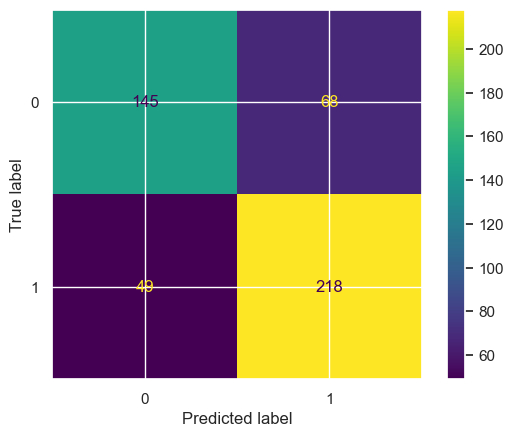

In [22]:
ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()

In [23]:
f1_score(y_test, pred)

0.7884267631103073

In [24]:
y_test.value_counts()

category
1           267
0           213
dtype: int64

### Randon Forest Classifier

In [25]:
m2 = RandomForestClassifier()

In [26]:
m2.fit(X_train, y_train)

C:\Users\dev3w\AppData\Local\Temp\ipykernel_10500\2755329036.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m2.fit(X_train, y_train)


RandomForestClassifier()

In [27]:
pred = m2.predict(X_test)

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       213
           1       0.81      0.82      0.82       267

    accuracy                           0.80       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.80      0.80      0.80       480



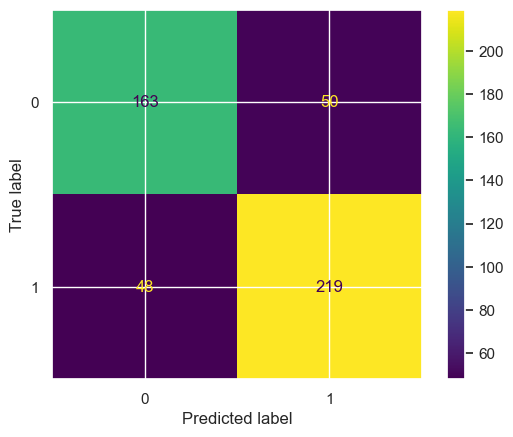

In [29]:
ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()

In [30]:
f1_score(y_test, pred)

0.8171641791044776

### XGBoost Classifier

In [31]:
m3 = XGBClassifier()

In [32]:
m3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
pred = m3.predict(X_test)

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       213
           1       0.81      0.83      0.82       267

    accuracy                           0.80       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.80      0.80      0.80       480



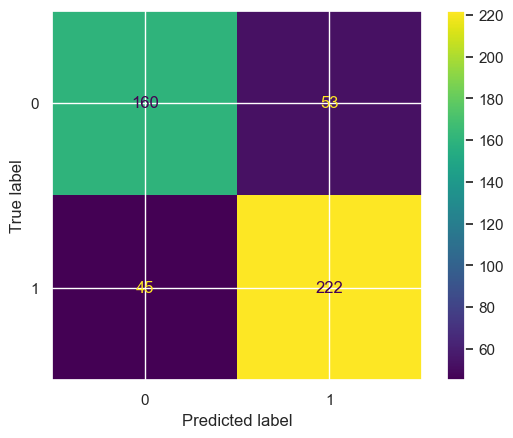

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()

In [36]:
f1_score(y_test, pred)

0.8191881918819188